**Customer Churn Prediction**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from matplotlib import style
style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">LOAD THE DATASET</p>

In [5]:
df = pd.read_csv('/content/data (4).csv')

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROJECT OBJECTIVES</p>

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOAD THE FIRST & LAST 5 ROWS OF THE DATASET</p>

In [6]:
#returns first 5 rows of the dataset
df.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#returns last 5 rows of the dataset
df.tail()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DISPLAY DATASET INFORMATION</p>

In [8]:
#number of rows & columns in the dataset
df.shape

(10000, 14)

In [9]:
#detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row          10000 non-null  int64  
 1   Id           10000 non-null  int64  
 2   Surname      10000 non-null  object 
 3   Score        10000 non-null  int64  
 4   Nationality  10000 non-null  object 
 5   Gender       10000 non-null  object 
 6   Age          10000 non-null  int64  
 7   Tenure       10000 non-null  int64  
 8   Balance      10000 non-null  float64
 9   Products     10000 non-null  int64  
 10  Card         10000 non-null  int64  
 11  Active       10000 non-null  int64  
 12  Salary       10000 non-null  float64
 13  Exited       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING & FEATURE ENGINEERING</p>

In [10]:
# drop columns l will not use
df= df.drop(columns=['Row','Id','Surname'])

In [11]:
#check for duplicate values
df.duplicated().sum()

0

* There aren't any missing values.The dataset is complete

In [12]:
#feature engineering
df['Age_bins']= pd.cut(df['Age'],bins= [18,30,50,70,92],labels= ['18-29','30-49','50-69','70-92'])

In [13]:
#check the dataset statistics
df.describe()

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis</p>

In [14]:
df.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-49
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-49


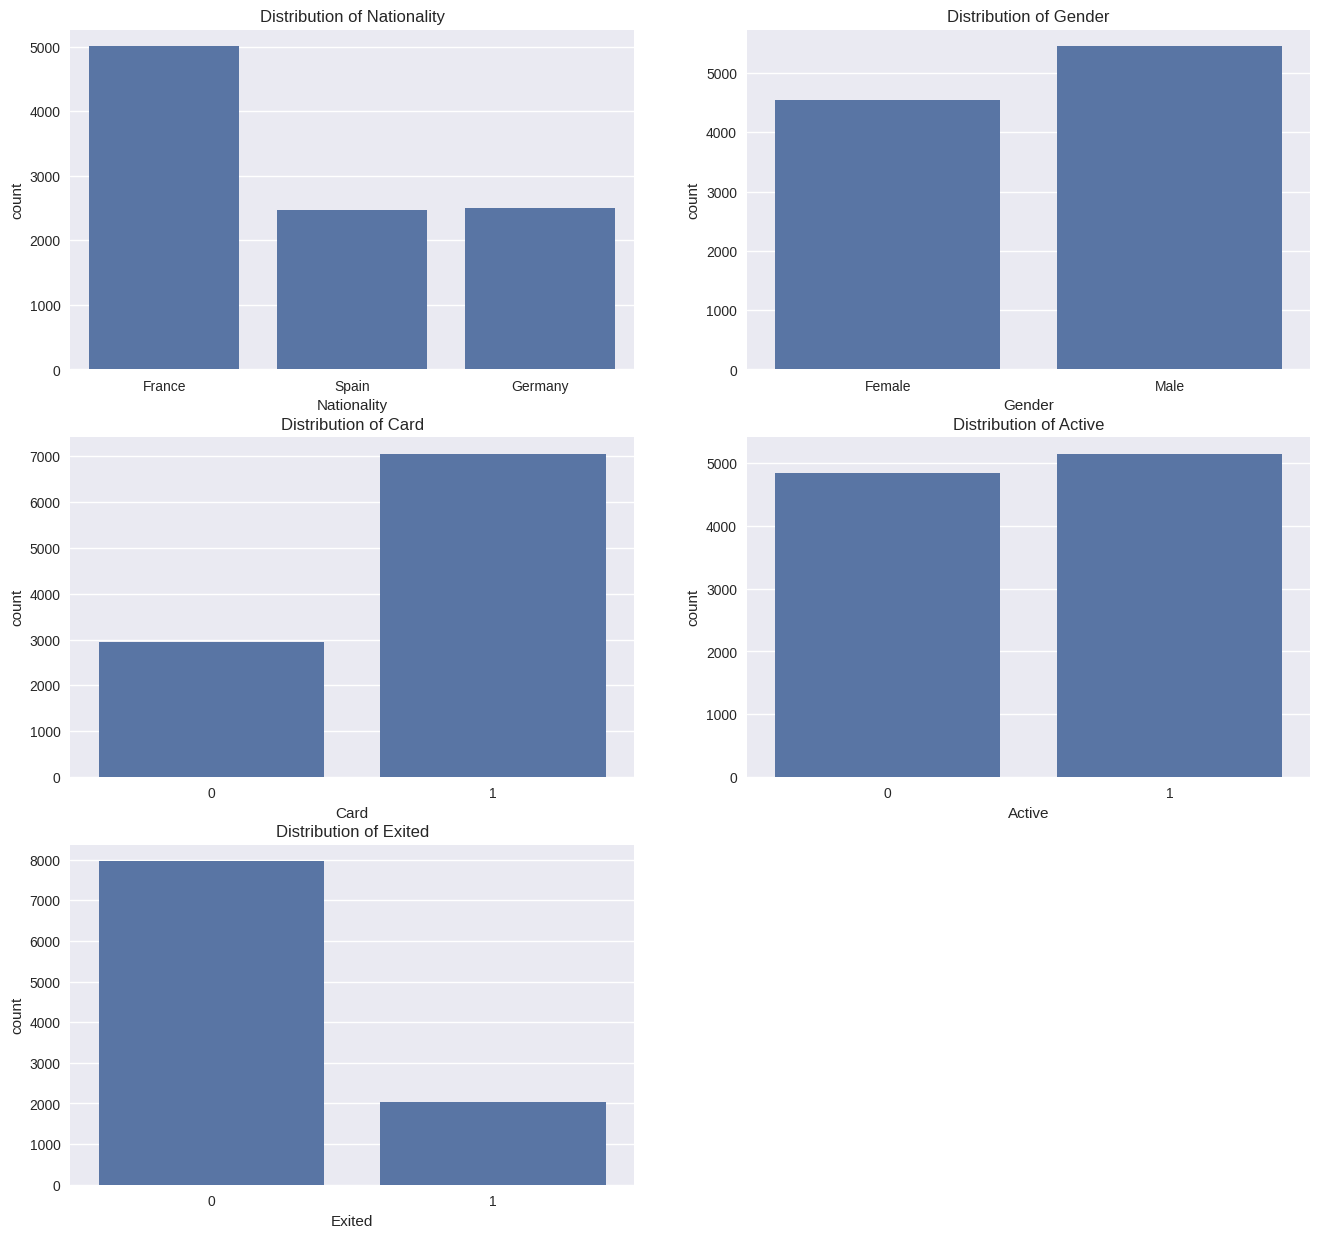

In [15]:
#categorical features
cat= ['Nationality','Gender','Card','Active','Exited']

plt.figure(figsize=(16,15))

for i,col in enumerate(cat):
    plt.subplot(3,2,i +1)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')

plt.show()

**Numerical Features**

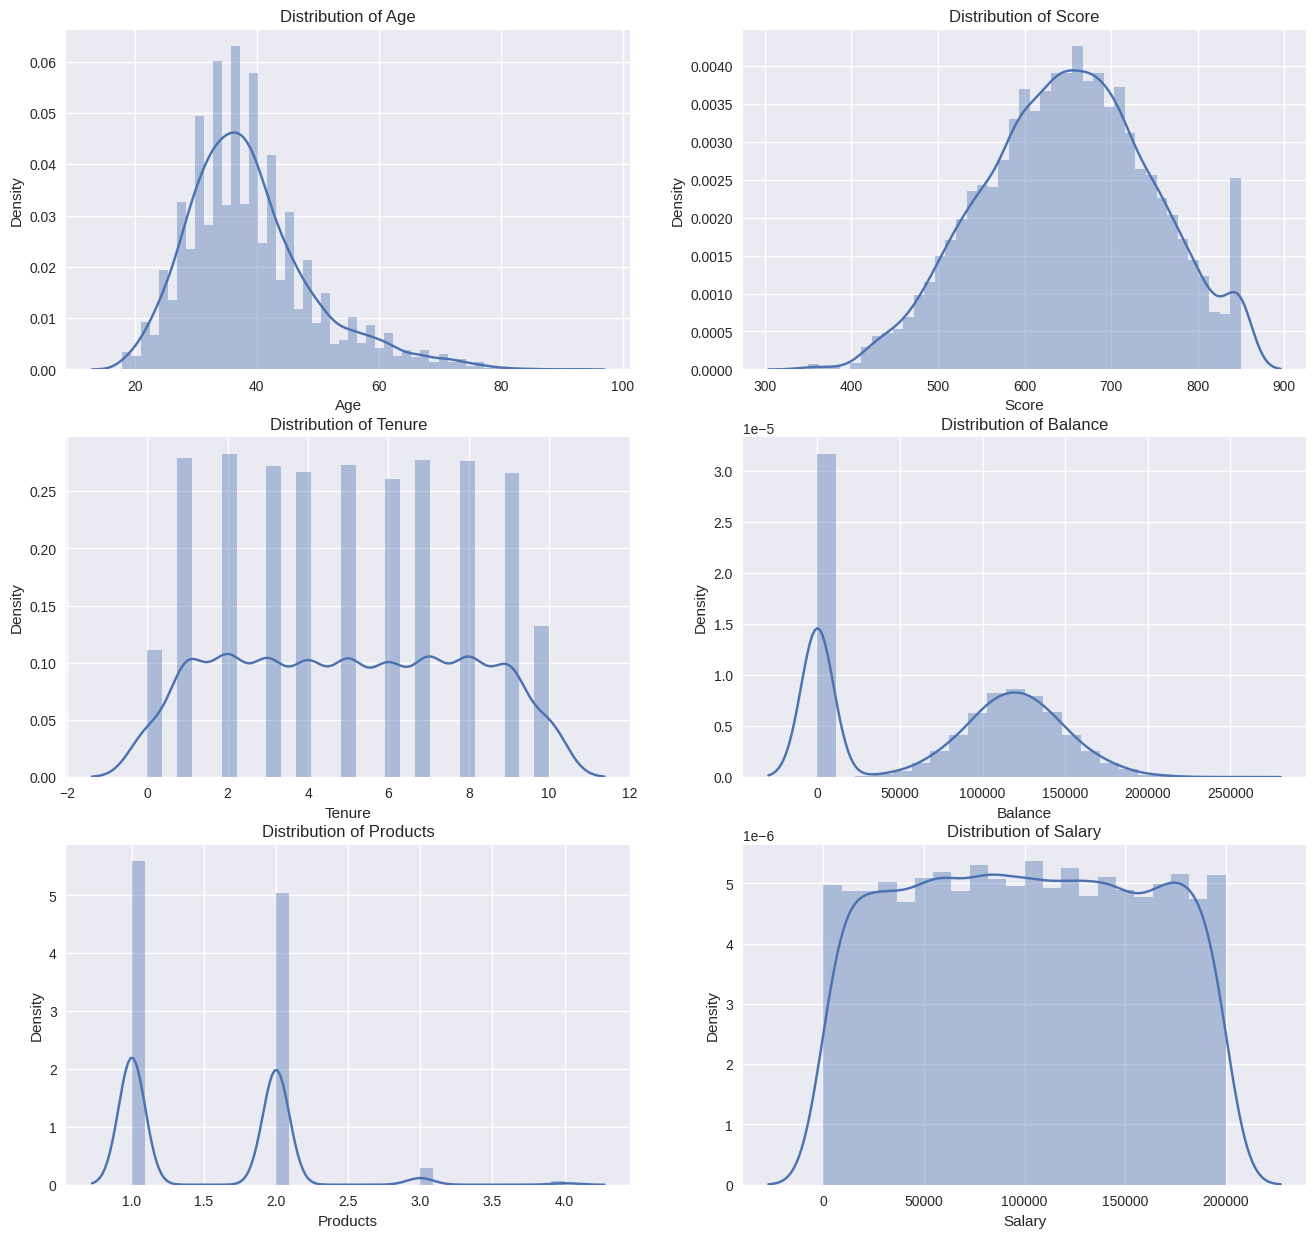

In [16]:
#numerical features
num= ['Age','Score','Tenure','Balance','Products','Salary']

plt.figure(figsize=(16,15))

for i,col in enumerate(num):
    plt.subplot(3,2,i +1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

Business Questions:-


1.  How many customers churned by age group?




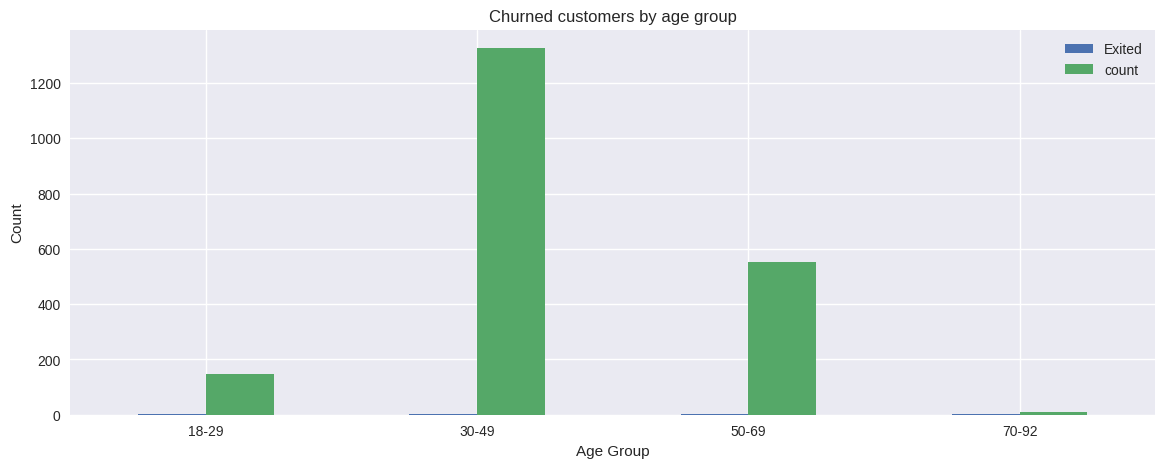

In [17]:
age= df[['Age_bins','Exited']]

age= age[(age['Exited']==1)]
age= age.groupby('Age_bins')['Exited'].value_counts().reset_index()
age.set_index('Age_bins',inplace=True)
age.plot(kind='bar',figsize=(14,5))
plt.title('Churned customers by age group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation= 0, ha='center')

plt.show()

**Insights**

* From the graph we can  observe  that age 30-49 has the highest number of churned customers,it is a high risk age group with 1326 churned customers.
* Age group 18-29 has a total of 146 churned customers
* Age group 50-69 has a total of 552 churned customers
* Age group 70-92 has the least churned customers at 11

2. <h4> How many customers churned by gender?

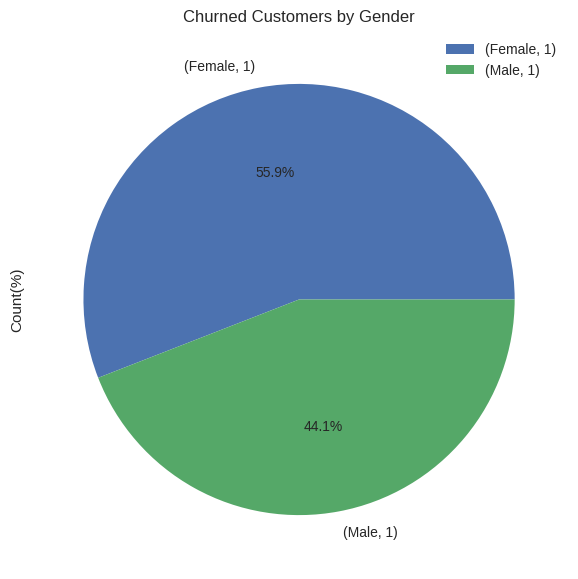

In [18]:
gen= df[['Gender','Exited']]
gen_churn= gen[(gen['Exited']==1)]
gen_churn= gen_churn.groupby('Gender')['Exited'].value_counts()
gen_churn.plot(kind='pie',y= gen_churn.index,autopct='%1.1f%%',figsize=(10,7))
plt.title('Churned Customers by Gender')
plt.ylabel('Count(%)')
plt.legend()

plt.show()

**Insights**
* As shown in the graph more females customers churned at 55.9% ,while the male customers churned at 44.1%

3. <h4> What is the total of customers?

In [19]:
Total_customers= len(df)
Total_customers

10000

**Insights**
Totals number of customers is 10000


4. <h4> What is the number of churned customers?

In [20]:
churned_customers= df[(df['Exited']==1)]
churned_customers= len(churned_customers)
churned_customers

2037

**Insights**

* The total number of churned customers is 2037

5. <h4> What is the customer churn rate?

In [21]:
churn_rate= churned_customers/Total_customers*100
round(churn_rate,1)

20.4

**Insights**

* The churn rate is 20.4%

6. <h4> What is the churn distribution by Products & Gender?

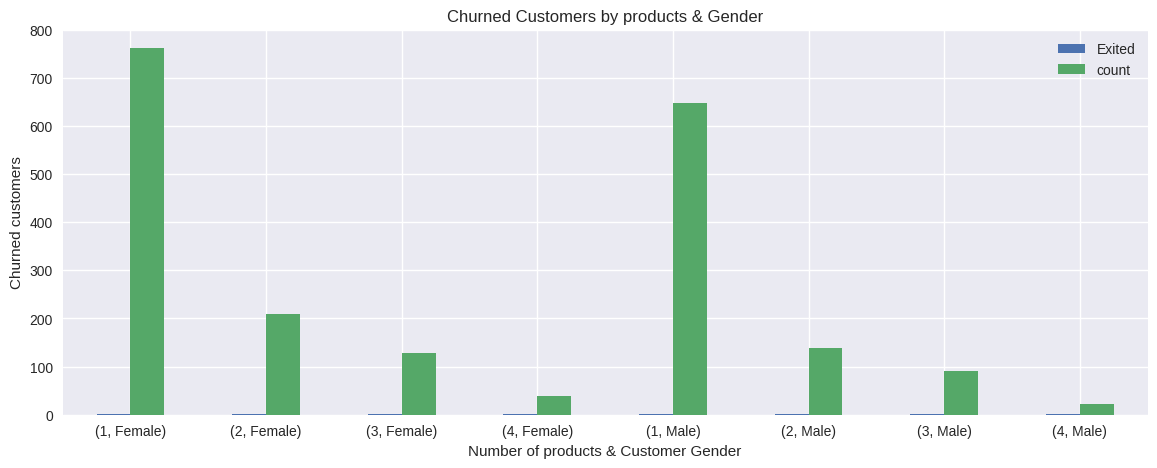

In [22]:
product= df[['Exited','Products','Gender']]

prod= product[(product['Exited']==1)]
prod= prod.groupby(['Exited','Gender'])['Products'].value_counts().reset_index()
prod.set_index(['Products','Gender'],inplace=True)
prod.plot(kind='bar',figsize=(14,5))
plt.title('Churned Customers by products & Gender')
plt.xlabel('Number of products & Customer Gender')
plt.ylabel('Churned customers')
plt.xticks(rotation=0,ha='center')

plt.show()

**Insights**
* As shown by the graph customers that purchased only one product have the highest churn rate at 1409 customers, while those with 4 products are the least to churn at 60 customers.
* The general trend is that the more products a customer purchases the less likely they are to churn. Female customers are more likely to churn than male customers.
* A total of 348 Customers churned with 2 products purchases while those with 3 products a total of 220 churned.
* There is a clear trend here the number of churned customers drastically decreases as the number of products increase.
*From this observation we can say that there's a linear relationship between churned customers & the number of products they purchase.Customers with the least products are more likely to leave the company.

7. <h4> What is the churn distribution by card?

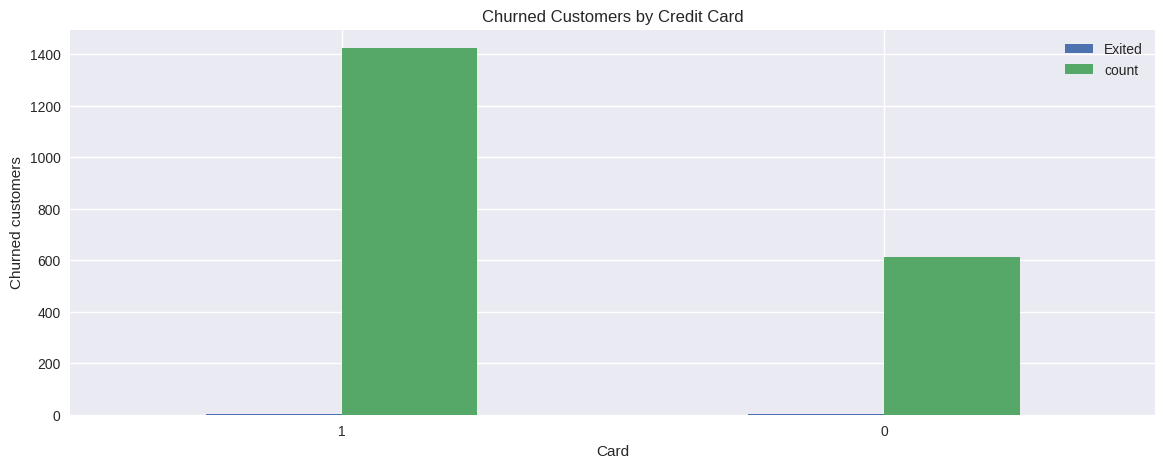

In [23]:
card= df[['Exited','Card']]
card= card[(card['Exited']==1)]
card= card.groupby('Exited')['Card'].value_counts().reset_index()
card.set_index('Card',inplace =True)
card.plot(kind='bar',figsize=(14,5))
plt.title('Churned Customers by Credit Card')
plt.xlabel('Card')
plt.ylabel('Churned customers')
plt.xticks(rotation=0,ha='center')

plt.show()

**Insights**
* Here we see that customers with credit cards have a higher churn rate at 1424 than those without at 613

8. <h4> What is the average credit score for churned customers?

In [24]:
score= df[['Score','Exited']]
score= score[(score['Exited']==1)]
score= score.groupby('Exited')['Score'].mean()
round(score)

Exited
1    645.0
Name: Score, dtype: float64

**Insights**
* The avg score by churned customers in 645

9. <h4> What is the churn distribution by tenure?

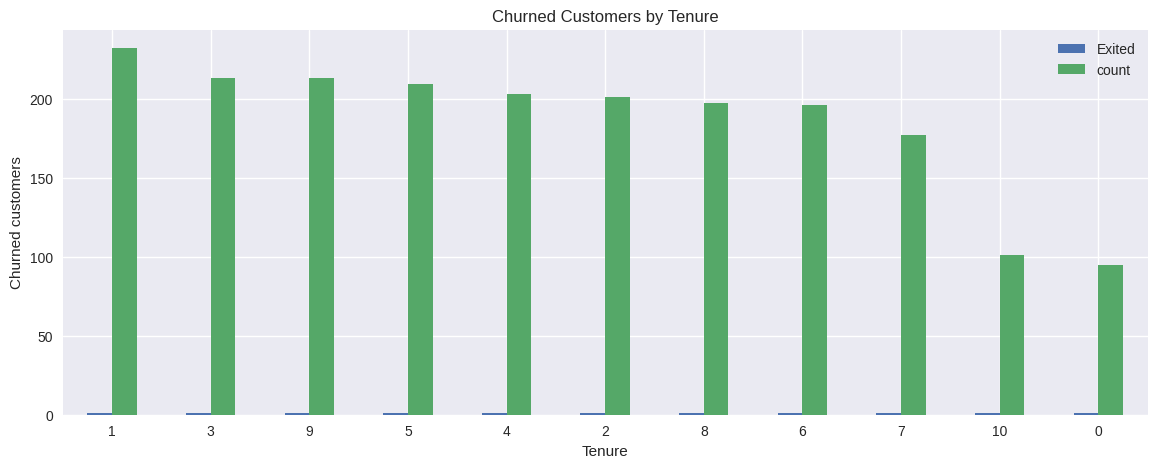

In [25]:
ten= df[['Exited','Tenure']]
ten= ten[(ten['Exited']==1)]
ten= ten.groupby('Exited')['Tenure'].value_counts().reset_index()
ten.set_index('Tenure',inplace =True)
ten= ten.sort_values(by='Exited',ascending=False)
ten.plot(kind='bar',figsize=(14,5))
plt.title('Churned Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churned customers')
plt.xticks(rotation=0,ha='center')

plt.show()

**Insights**

* Customers with a tenure of 1 year churned the most at 232 in total.
* There is a slight decrease in churned customers at the Tenure increases, the customers loyalty improves with more years in the company

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In [26]:
#Encodeing  categorical features
le= LabelEncoder()

cat= ['Nationality','Gender','Card','Active','Exited']

for i in (cat):
    df[i]= le.fit_transform(df[i])

In [27]:
#split the data into features & target variable
X= df.drop(columns=['Exited','Age_bins'],axis=1)

y=df['Exited']

In [28]:
#resampple the data
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=0)

X_re,y_re= smote.fit_resample(X,y)

print(X_re.shape,y_re.shape)

(15926, 10) (15926,)


In [29]:
#Standardize the data
sc= StandardScaler()

num= ['Age','Score','Tenure','Balance','Products','Salary']
for i in (num):
    df[i]= sc.fit_transform(df[i].values.reshape(-1,1))

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SPLIT THE DATASET INTO TRAINING & TESTING SETS</p>

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_re, y_re, test_size=0.30, random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11148, 10), (4778, 10), (11148,), (4778,))

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODELS TRAINING</p>

1)**LOGISTIC REGRESSION MODEL**

In [31]:
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred= log_reg.predict(X_test)
acc= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2293
           1       0.69      0.65      0.67      2485

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.67      4778
weighted avg       0.67      0.67      0.67      4778



2)**RANDOM FOREST MODEL**

In [33]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred= rf.predict(X_test)
acc_rf= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2350
           1       0.87      0.84      0.86      2428

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



3)**GRADIENT BOOSTINF MODEL**

In [35]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [36]:
y_pred= gb.predict(X_test)
acc_gb= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2407
           1       0.85      0.84      0.84      2371

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



4)**KNN MODEL**

In [37]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred= knn.predict(X_test)
acc_knn= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      2007
           1       0.75      0.64      0.69      2771

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.66      4778
weighted avg       0.68      0.67      0.67      4778



<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL EVALUATION</p>

In [39]:
models= pd.Series([acc,acc_rf,acc_gb,acc_knn],['LogReg','RF','GB','KNN'])

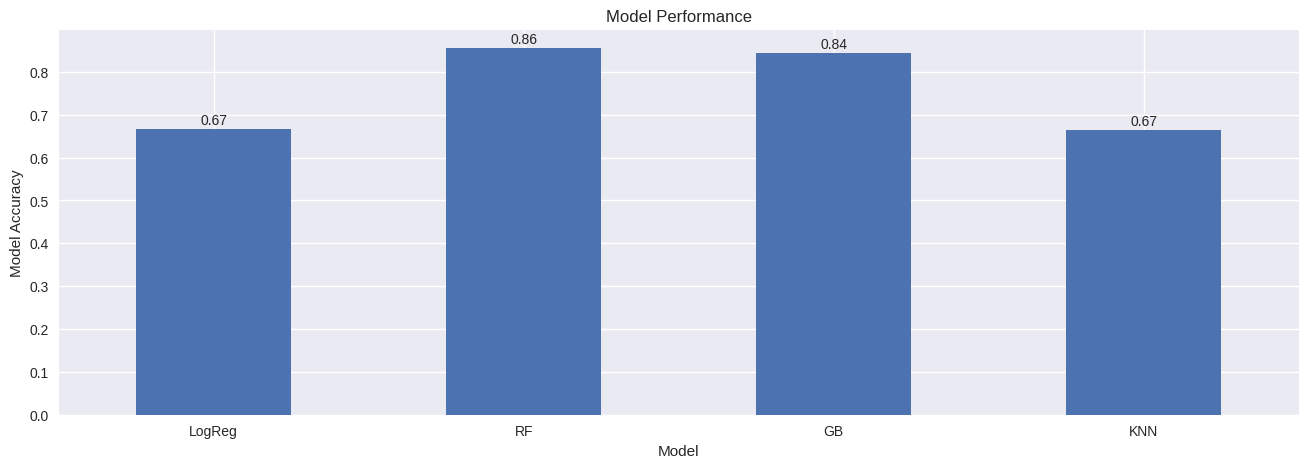

In [40]:
models.plot(kind='bar',figsize=(16,5))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=0,ha='center')

for i,v in enumerate(models):
    plt.text(i,v + 0.01,str(round(v,2)),ha='center')
plt.show()

**Insights**

* The random forest model performed 86% more accurately than the other models.

<a id="2"></a>
<p style="background-color:#254336;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SAVE THE MODEL</p>

In [41]:
import pickle
pickle.dump(rf,open('./churn_pred_rf.sav', 'wb'))

In [42]:
pickle.load(open('churn_pred_rf.sav', 'rb'))

RandomForestClassifier()